# Atividade 1 - Transformações Lineares

Este notebook demonstra visual e matematicamente a aplicação de transformações lineares (Rotação e Cisalhamento), a interpretação geométrica do determinante e a análise de similaridade entre vetores via produto escalar.

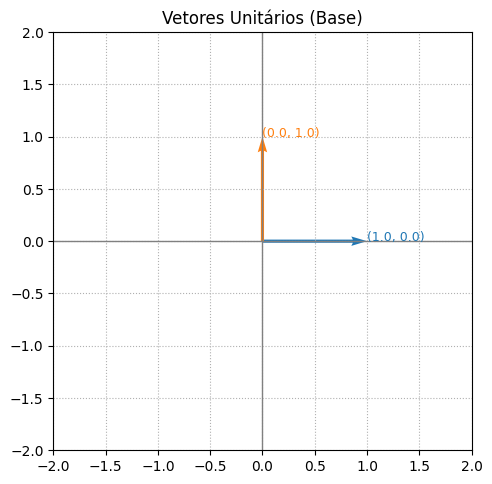

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#função de plotage
def plot_vectors(titles, vector_sets, comparison=False, determinant=False):
    """
    função personalizada para plotar vetores, comparar transformações
    e visualizar o determinante (área).
    """
    n_plots = len(vector_sets)
    
    #configura o tamanho da figura
    cols = n_plots if comparison else 1
    fig, axes = plt.subplots(1, cols, figsize=(5 * cols, 5))
    
    #garante que axes seja sempre uma lista, mesmo se for só 1 plot
    if cols == 1:
        axes = [axes]
    
    for i, (ax, vectors) in enumerate(zip(axes, vector_sets)):
        #configuração do Grid
        ax.axhline(0, color='grey', lw=1)
        ax.axvline(0, color='grey', lw=1)
        ax.grid(True, linestyle=':')
        
        #cores para os vetores
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        
        #se ativado o determinante, desenha o polígono (Paralelogramo)
        if determinant and len(vectors) >= 2:
            #assume que os vetores partem da origem (0,0)
            origin = np.array([0, 0])
            v1 = vectors[0]
            v2 = vectors[1]
            
            #vértices do paralelogramo: 0 -> v1 -> (v1+v2) -> v2 -> 0
            #nota: Isso preenche a área gerada pelos dois primeiros vetores da lista
            poly_points = [origin, v1, v1 + v2, v2]
            poly = Polygon(poly_points, facecolor='yellow', alpha=0.3, edgecolor='black')
            ax.add_patch(poly)
               
        #plota os vetores usando Quiver
        for j, v in enumerate(vectors):
            color = colors[j % len(colors)]
            #quiver(x, y, u, v, ...)
            ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
                      color=color, label=f'v{j+1}')
            
            #anotação das coordenadas na ponta do vetor (ajuda a visualizar os valores)
            if abs(v[0]) < 10 and abs(v[1]) < 10: # Só mostra se não for muito grande
                ax.text(v[0], v[1], f"({v[0]:.1f}, {v[1]:.1f})", fontsize=9, color=color)

        #ajuste dinâmico dos limites do gráfico
        #pega o valor máximo absoluto entre todas as coordenadas para centralizar
        all_coords = vectors.flatten()
        if len(all_coords) > 0:
            limit = max(np.max(np.abs(all_coords)), 1) + 1
        else:
            limit = 5
            
        ax.set_xlim(-limit, limit)
        ax.set_ylim(-limit, limit)
        ax.set_aspect('equal')
        
        #define o título
        title_text = titles[i] if i < len(titles) else f"Plot {i+1}"
        ax.set_title(title_text)

    plt.tight_layout()
    plt.show()


#configuração inicial
base_vectors = np.array([[1, 0], [0, 1]])

plot_vectors(
    ['Vetores Unitários (Base)'],
    [base_vectors],
    comparison=False,
    determinant=False,
)

## 1. Aplicação das Transformações: Rotação + Shear

Nesta etapa, aplicaremos as transformações na seguinte ordem:
1.  **Rotação Horária de 90°** ($R$)
2.  **Shear Horizontal** (Cisalhamento) com $k=2$ ($S$)

As matrizes são definidas como:

$$R = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$

$$S = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},

\text{ onde } k=2$$

A transformação composta resultante é $S \cdot R$.

In [ ]:
#definindo as matrizes

#matriz de rotação horária 90°
R_matrix = np.array([
    [0, 1],
    [-1, 0]
])

#função para criar matriz de shear
def get_shear_matrix(k):
    return np.array([
        [1, k],
        [0, 1]
    ])

S_matrix = get_shear_matrix(k=2)

print("Matriz de Rotação (R):\n", R_matrix)
print("\nMatriz de Shear (S):\n", S_matrix)

Matriz de Rotação (R):
 [[ 0  1]
 [-1  0]]

Matriz de Shear (S):
 [[1 2]
 [0 1]]


### 1.1 Procedimento: Multiplicação como Composição Linear

Conforme os slides 60-68 e 70-92 ("Matrix multiplication as composition"), realizamos a composição não apenas multiplicando as matrizes resultantes diretamente, mas construindo o vetor final através da combinação linear das colunas da matriz externa ponderadas pelos valores da matriz interna.

Base Inicial:
 [[1 0]
 [0 1]]

Após Rotação 90°:
 [[ 0  1]
 [-1  0]]

Final (Rotação + Shear):
 [[-2.  1.]
 [-1.  0.]]


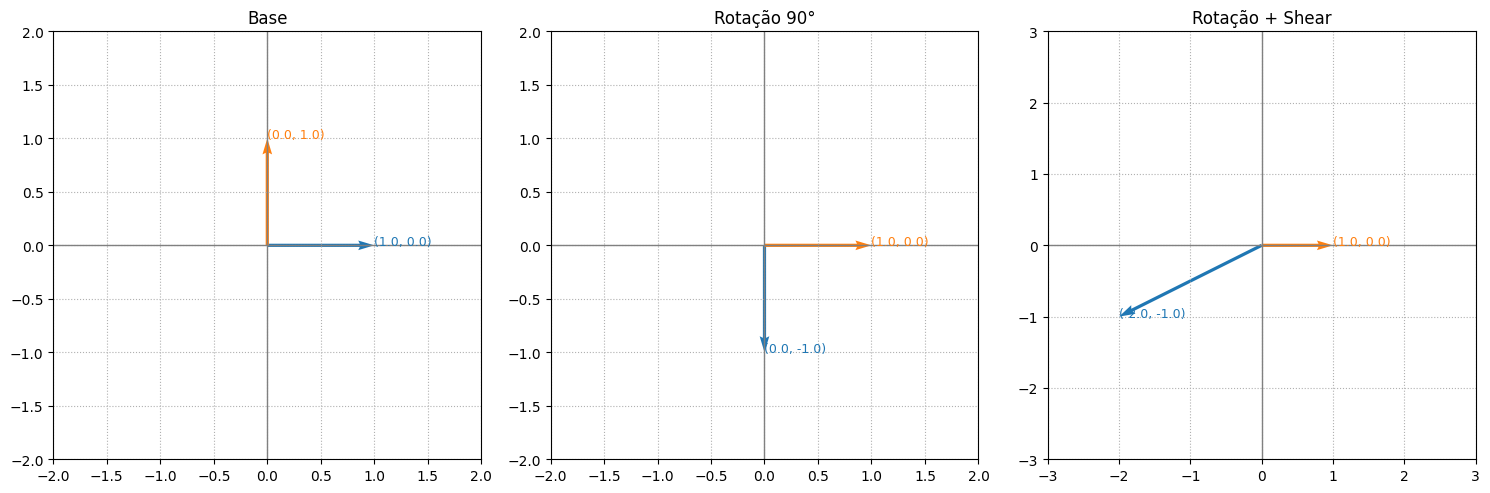

In [ ]:
def compose_transformations_manual(inner_matrix, outer_matrix, vectors):
    #lista para poder armazenar as colunas da nova matriz composta
    composition_cols = []
    
    #itera sobre as colunas da matriz interna (R)
    for col_idx in range(inner_matrix.shape[1]):
        col_vec_inner = inner_matrix[:, col_idx]
        
        #combinação linear das colunas da matriz externa (S)
        #S_col0 * R_0j + S_col1 * R_1j ...
        weighted_sum = np.zeros(outer_matrix.shape[0])
        for i, scalar in enumerate(col_vec_inner):
            weighted_sum += scalar * outer_matrix[:, i]
            
        composition_cols.append(weighted_sum)
    
    #reconstroi a matriz composta final
    composition_matrix = np.column_stack(composition_cols)
    
    #aplica a matriz composta aos vetores
    return np.array([composition_matrix @ v for v in vectors])

#aplicação: Primeiro Rotação, depois Shear
#matriz Interna = R, Matriz Externa = S
vectors_rotated = np.array([R_matrix @ v for v in base_vectors])
vectors_final_order1 = compose_transformations_manual(R_matrix, S_matrix, base_vectors)

print("Base Inicial:\n", base_vectors.T)
print("\nApós Rotação 90°:\n", vectors_rotated.T)
print("\nFinal (Rotação + Shear):\n", vectors_final_order1.T)

plot_vectors(
    ['Base', 'Rotação 90°', 'Rotação + Shear'],
    [base_vectors, vectors_rotated, vectors_final_order1],
    comparison=True,
    determinant=False
)

## 2. O Determinante e a Área

O determinante representa o fator de escala da área.
* A rotação apenas gira o espaço ($det=1$).
* O shear desloca as paralelas, mas mantém a área da base x altura constante ($det=1$).

Logo, a área do paralelogramo formado pelos vetores transformados deve permanecer **1**.

Determinante calculado: 1.00


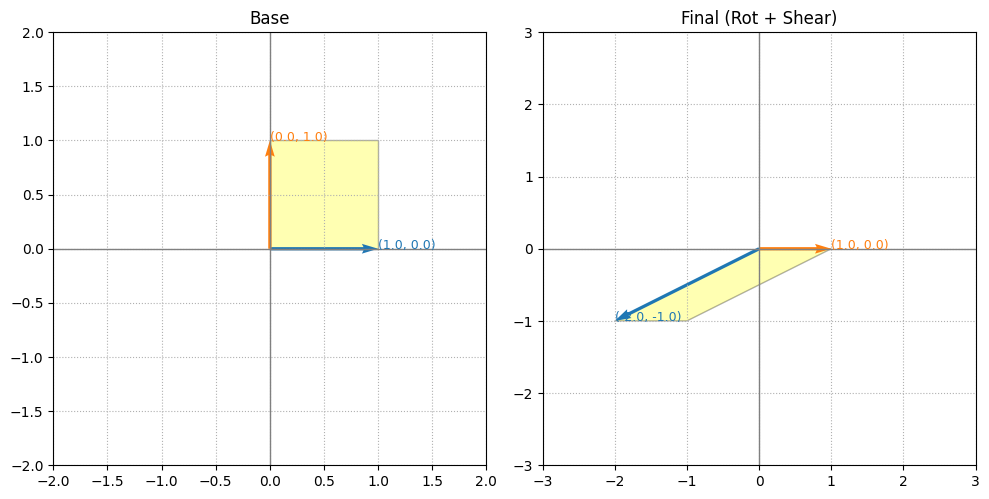

In [ ]:
#cálculo do determinante da transformação composta
det_val = np.linalg.det(S_matrix @ R_matrix)

print(f"Determinante calculado: {det_val:.2f}")

plot_vectors(
    ['Base', 'Final (Rot + Shear)'],
    [base_vectors, vectors_final_order1],
    comparison=True,
    determinant=True #ativa a visualização da área
)

## 3. Invertendo a Ordem: Shear + Rotação

Aqui invertemos a aplicação: primeiro o **Shear**, depois a **Rotação**.
A operação matricial passa a ser $R \cdot S$. Como a multiplicação de matrizes não é comutativa, esperamos um resultado visual e numérico diferente nas coordenadas, embora a área (determinante) deva continuar sendo 1.


Base Inicial:
 [[1 0]
 [0 1]]

Após Shear:
 [[1 2]
 [0 1]]

Final Inverso (Shear + Rotação):
 [[ 0.  1.]
 [-1. -2.]]


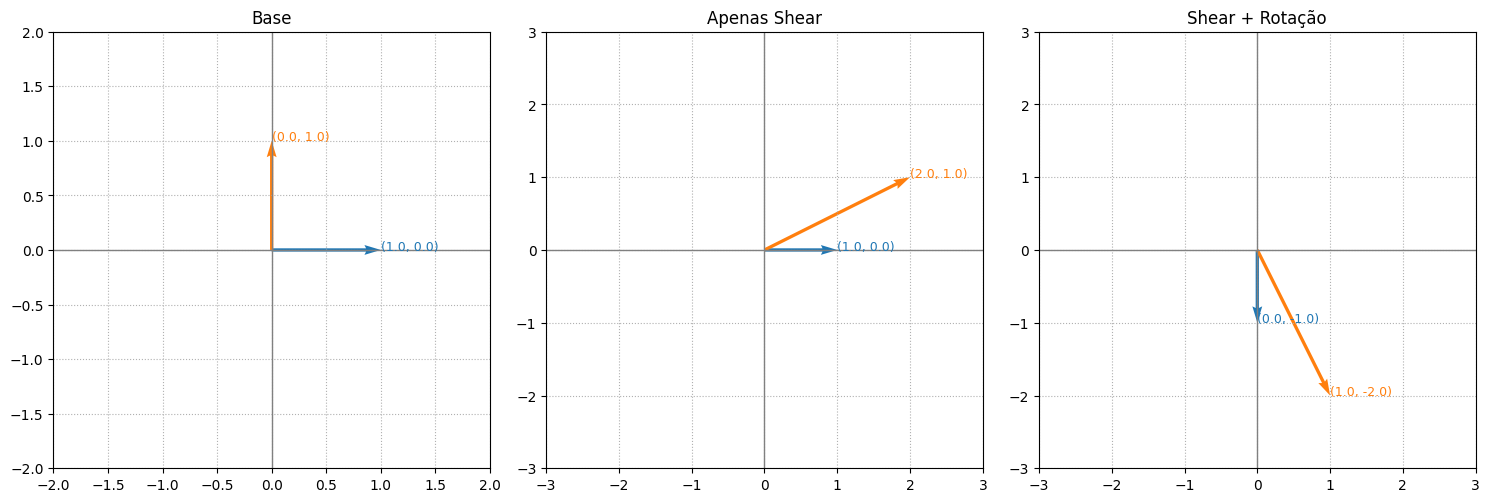

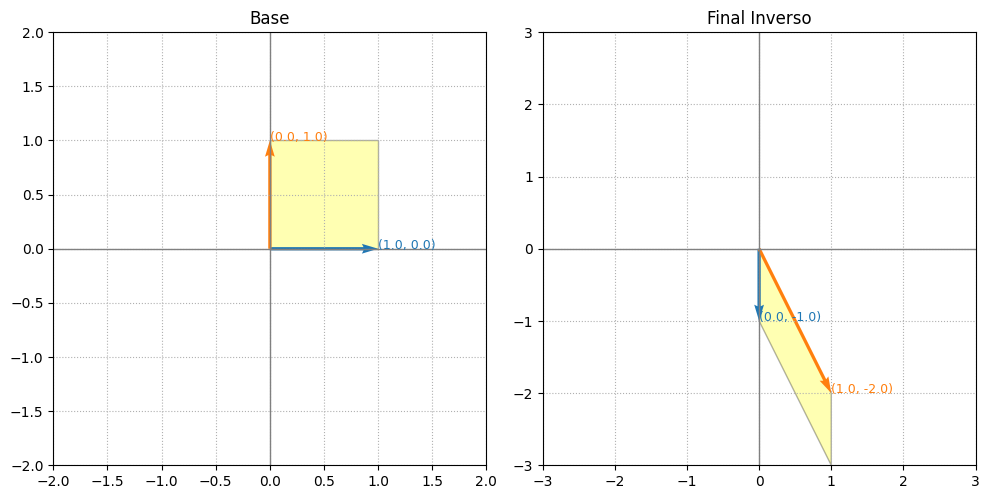

In [ ]:
#ordem Inversa: Shear (Interna) -> Rotação (Externa)
vectors_sheared = np.array([S_matrix @ v for v in base_vectors])
vectors_final_inverse = compose_transformations_manual(S_matrix, R_matrix, base_vectors)

print("Base Inicial:\n", base_vectors.T)
print("\nApós Shear:\n", vectors_sheared.T)
print("\nFinal Inverso (Shear + Rotação):\n", vectors_final_inverse.T)

plot_vectors(
    ['Base', 'Apenas Shear', 'Shear + Rotação'],
    [base_vectors, vectors_sheared, vectors_final_inverse],
    comparison=True,
    determinant=False
)

# Determinante da inversa
plot_vectors(
    ['Base', 'Final Inverso'],
    [base_vectors, vectors_final_inverse],
    comparison=True,
    determinant=True
)

## 4. Produto Escalar e Ortogonalidade

Vamos transformar um vetor $x$ de duas dimensões para obter um vetor $y$ orientado a 90° (rotação). Em seguida, calculamos o produto escalar.

Teoria: Se dois vetores são ortogonais (90° entre si), seu produto escalar deve ser **zero**.
$$x \cdot y = 0 \iff x \perp y$$

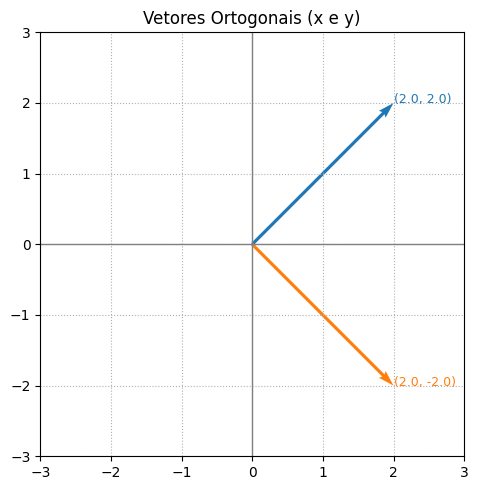

Vetor x: [2 2]
Vetor y (rotacionado): [ 2 -2]
Produto Escalar: 0
Conclusão: O produto escalar é zero, confirmando ortogonalidade.


In [ ]:
# Vetor arbitrário x
vec_x = np.array([2, 2])

#obtem y através da rotação de 90° em x
vec_y = R_matrix @ vec_x 

#plota os vetores
plot_vectors(
    ['Vetores Ortogonais (x e y)'], 
    [np.array([vec_x, vec_y])], 
    comparison=False, 
    determinant=False
)

#calculo do produto escalar
dot_product = np.dot(vec_x, vec_y)

print(f"Vetor x: {vec_x}")
print(f"Vetor y (rotacionado): {vec_y}")
print(f"Produto Escalar: {dot_product}")

if np.isclose(dot_product, 0):
    print("Conclusão: O produto escalar é zero, confirmando ortogonalidade.")

## 5. Análise de Código e Conclusão

Análise baseada nos vetores fornecidos:
* $v_1 = [1, 2]$
* $v_2 = [4, 5]$

Vetor v1: [1 2]
Vetor v2: [4 5]
Produto Escalar Resultante: 14


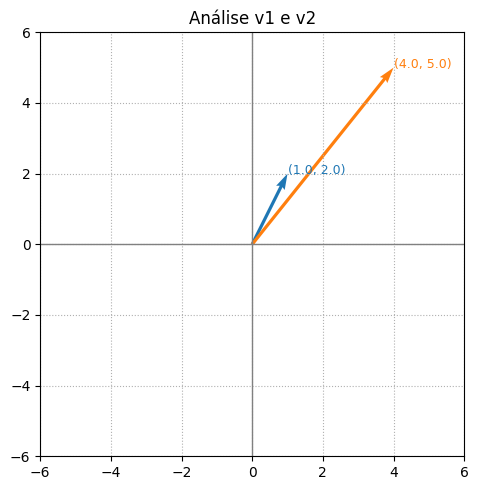

In [ ]:
v1 = np.array([1, 2])
v2 = np.array([4, 5])

#cálculo do produto escalar
dot_analysis = np.dot(v1, v2)

print(f"Vetor v1: {v1}")
print(f"Vetor v2: {v2}")
print(f"Produto Escalar Resultante: {dot_analysis}")

#visualização da similaridade
plot_vectors(['Análise v1 e v2'], [np.array([v1, v2])], comparison=False, determinant=False)

### Conclusão da Análise

O produto escalar entre $v_1$ e $v_2$ resultou em **14**.

**Interpretação:**
1.  **Similaridade:** O valor é positivo e significativamente maior que zero. Isso indica que os vetores apontam para uma direção geral similar (ângulo agudo entre eles).
2.  **Comparação:** Diferente do exercício anterior onde o resultado foi 0 (vetores perpendiculares), aqui existe uma forte projeção de um vetor sobre o outro. Eles "crescem" juntos no plano cartesiano.